In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
from sklearn.metrics import mean_absolute_error, mean_squared_error

INFORMATIONS DE BASE
Période couverte: de 2011-01-01 00:00:00 à 2012-12-31 00:00:00
Nombre de jours: 731
Valeurs manquantes dans cnt: 0

Statistiques descriptives de cnt:
count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64


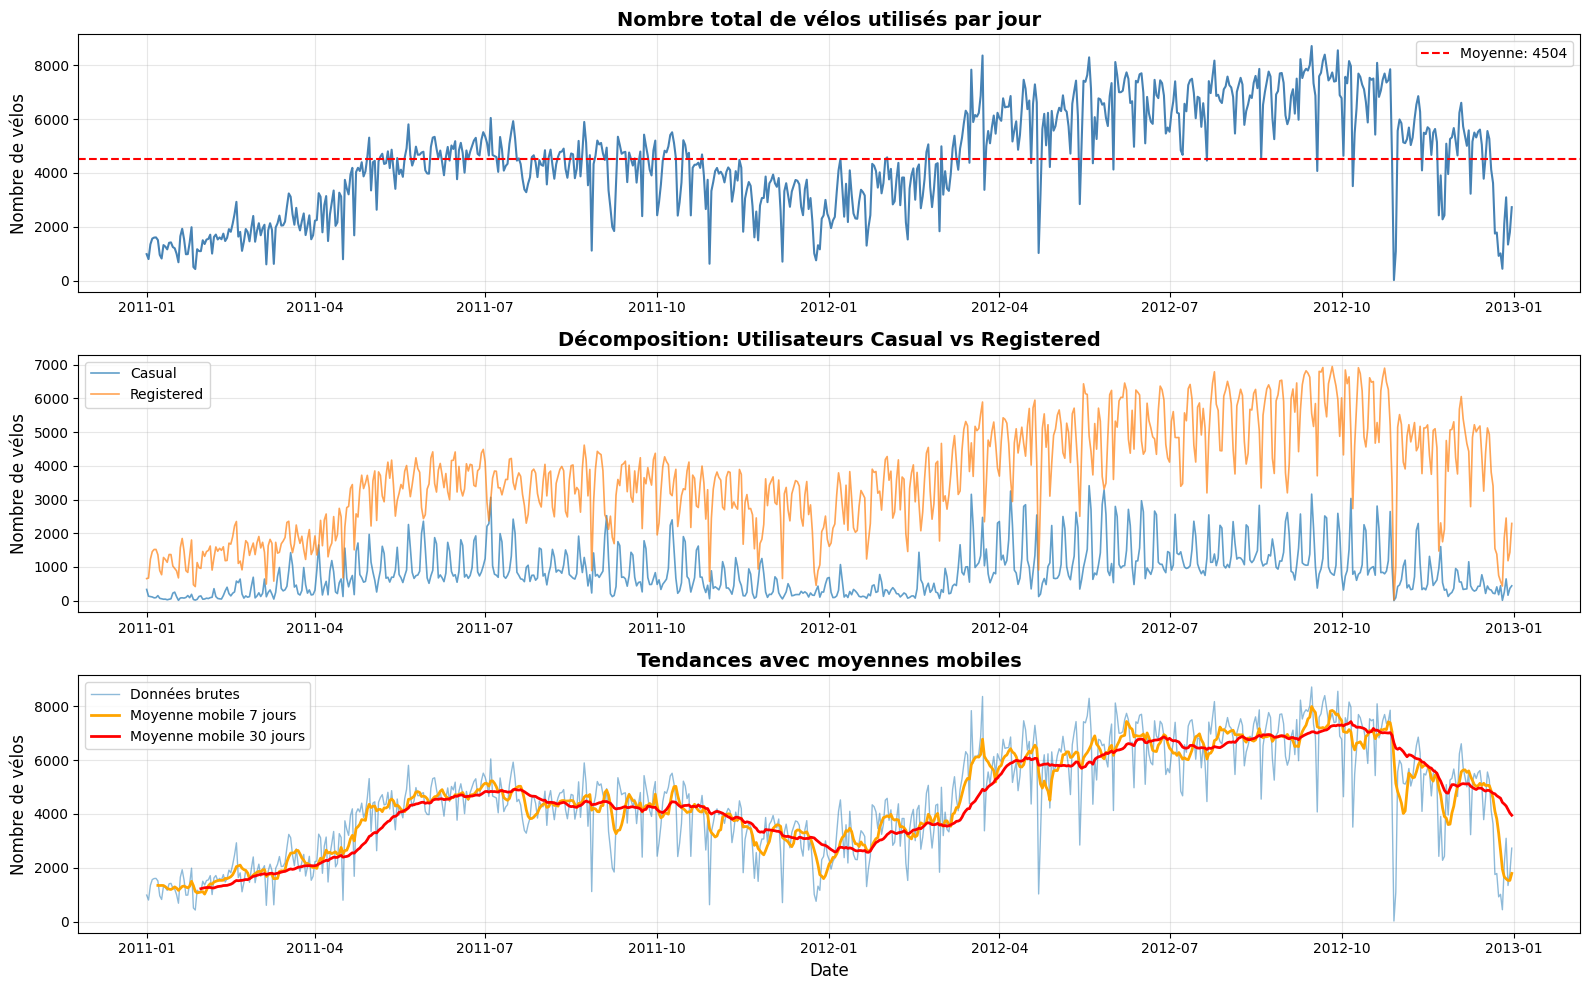

In [2]:
data = pd.read_csv("bike_daily.csv")
data.head()

# %%
data['dteday'] = pd.to_datetime(data['dteday'])
data = data.sort_values('dteday')
data.set_index('dteday', inplace=True)

print("="*60)
print("INFORMATIONS DE BASE")
print("="*60)
print(f"Période couverte: de {data.index.min()} à {data.index.max()}")
print(f"Nombre de jours: {len(data)}")
print(f"Valeurs manquantes dans cnt: {data['cnt'].isna().sum()}")
print(f"\nStatistiques descriptives de cnt:")
print(data['cnt'].describe())

fig, axes = plt.subplots(3, 1, figsize=(16, 10))

# Graphique principal
axes[0].plot(data.index, data['cnt'], linewidth=1.5, color='steelblue')
axes[0].set_title('Nombre total de vélos utilisés par jour', 
                  fontsize=14, fontweight='bold')
axes[0].set_ylabel('Nombre de vélos', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=data['cnt'].mean(), color='red', linestyle='--', 
                label=f'Moyenne: {data["cnt"].mean():.0f}')
axes[0].legend()

# Casual vs Registered
if 'casual' in data.columns and 'registered' in data.columns:
    axes[1].plot(data.index, data['casual'], label='Casual', 
                 linewidth=1.2, alpha=0.7)
    axes[1].plot(data.index, data['registered'], label='Registered', 
                 linewidth=1.2, alpha=0.7)
    axes[1].set_title('Décomposition: Utilisateurs Casual vs Registered', 
                      fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Nombre de vélos', fontsize=12)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

# Moyennes mobiles
axes[2].plot(data.index, data['cnt'], linewidth=1, 
             alpha=0.5, label='Données brutes')
axes[2].plot(data.index, data['cnt'].rolling(window=7).mean(), 
             linewidth=2, label='Moyenne mobile 7 jours', color='orange')
axes[2].plot(data.index, data['cnt'].rolling(window=30).mean(), 
             linewidth=2, label='Moyenne mobile 30 jours', color='red')
axes[2].set_title('Tendances avec moyennes mobiles', 
                  fontsize=14, fontweight='bold')
axes[2].set_ylabel('Nombre de vélos', fontsize=12)
axes[2].set_xlabel('Date', fontsize=12)
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


ADF statistic : -1.8774481444374314
p-value : 0.3427434403392186


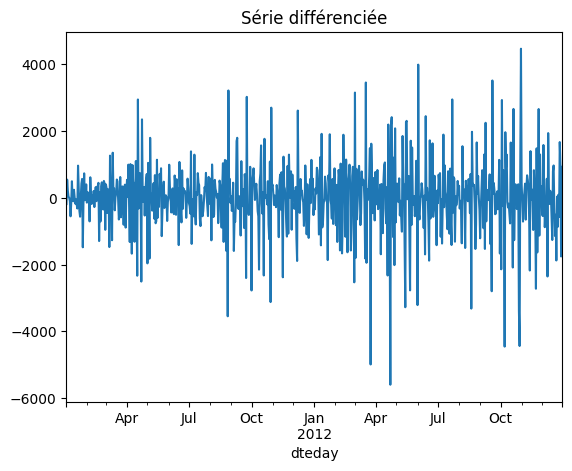

ADF après différenciation : 1.0467797548017554e-21


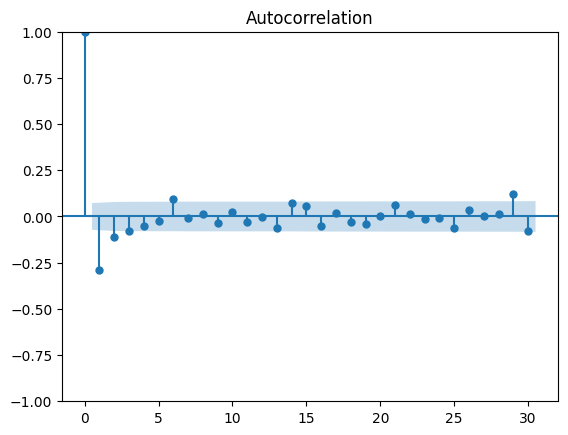

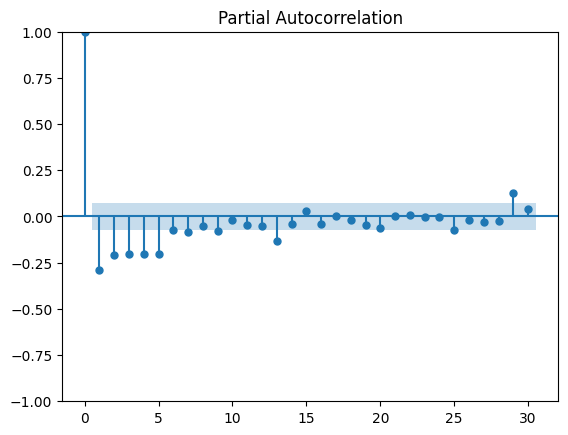

c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\enzom\O

    p  d  q           AIC           BIC
0   1  1  1  12050.020480  12063.799613
1   3  1  1  12050.145280  12073.110502
2   2  1  1  12051.049398  12069.421577
3   1  1  2  12051.310426  12069.682604
4   4  1  1  12052.985309  12080.543576
5   3  1  2  12053.176429  12080.734697
6   4  1  2  12053.239889  12085.391201
7   2  1  2  12054.239629  12077.204852
8   0  1  2  12055.588676  12069.367810
9   4  1  0  12100.164465  12123.129687
10  0  1  1  12110.027037  12119.213126
11  3  1  0  12128.550224  12146.922402
12  2  1  0  12156.394861  12170.173994
13  1  1  0  12187.633171  12196.819260
14  0  1  0  12250.269683  12254.862727
                               SARIMAX Results                                
Dep. Variable:               cnt_diff   No. Observations:                  730
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -6021.891
Date:                Thu, 04 Dec 2025   AIC                          12051.781
Time:                        00:30:44   BIC 

c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [3]:
result = adfuller(data["cnt"])
print(f"ADF statistic : {result[0]}")
print(f"p-value : {result[1]}")

data["cnt_diff"] = data["cnt"].diff()
data["cnt_diff"].dropna().plot(title="Série différenciée")
plt.show()

result = adfuller(data["cnt_diff"].dropna())
print(f"ADF après différenciation : {result[1]}")

plot_acf(data["cnt_diff"].dropna(), lags=30)
plot_pacf(data["cnt_diff"].dropna(), lags=30)
plt.show()

p_max = 4 
q_max = 2 

results = []


for p in range(p_max + 1):
    for q in range(q_max + 1):
        try:
            model = ARIMA(data["cnt"], order=(p, 1, q))
            res = model.fit()

            results.append({
                "p": p,
                "d": 1,
                "q": q,
                "AIC": res.aic,
                "BIC": res.bic
            })
        except Exception as e:
            # si le modèle ne converge pas, on le saute
            print(f"ARIMA({p},1,{q}) a échoué : {e}")

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=["AIC", "BIC"]).reset_index(drop=True)
print(results_df)

y_diff = data["cnt_diff"].dropna()

model_arma11 = ARIMA(y_diff, order=(1, 0, 1))
res_arma11 = model_arma11.fit()
print(res_arma11.summary())

lb = acorr_ljungbox(res_arma11.resid, lags=[10, 20], return_df=True)
print("\nTest de Ljung-Box sur les résidus (ARMA(1,1) sur cnt_diff) :")
print(lb)

C:\Users\hugom\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hugom\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                               cnt   No. Observations:                  731
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -5950.791
Date:                           Wed, 03 Dec 2025   AIC                          11911.581
Time:                                   09:06:33   BIC                          11934.485
Sample:                               01-01-2011   HQIC                         11920.423
                                    - 12-31-2012                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3615      0.040      9.150      0.000       0.284       0.439
ma.L1         -0.9044      0.022    -40.273

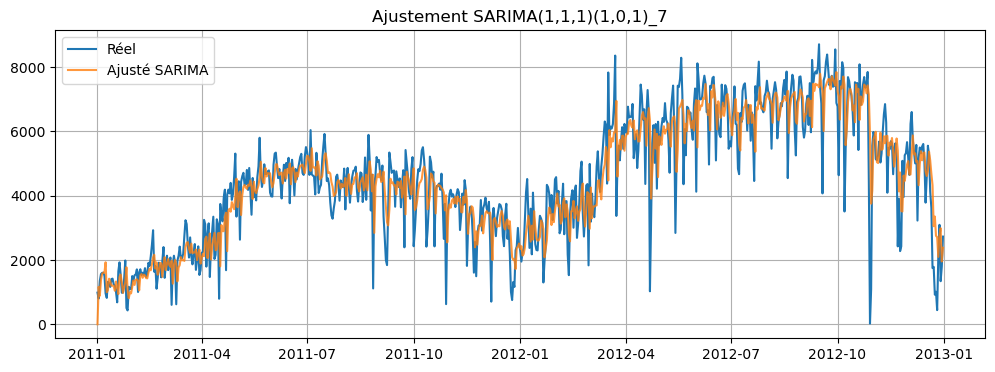

C:\Users\hugom\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hugom\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hugom\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


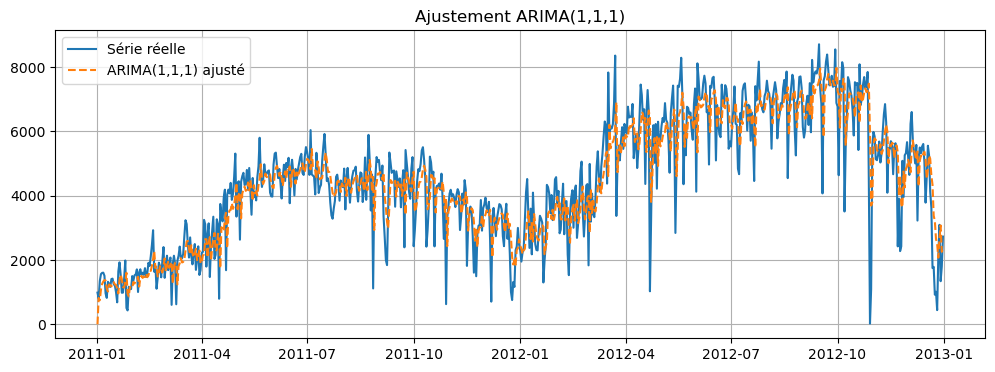

In [4]:
y = data["cnt"]
sarima_model = SARIMAX(
    y,
    order=(1, 1, 1),          # partie non saisonnière
    seasonal_order=(1, 0, 1, 7),  # partie saisonnière hebdomadaire
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_res = sarima_model.fit()
print(sarima_res.summary())

comparison = pd.DataFrame({
    "Modèle": ["ARMA(1,1)", "SARIMA(1,1,1)(1,0,1)_7"],
    "AIC": [res_arma11.aic, sarima_res.aic],
    "BIC": [res_arma11.bic, sarima_res.bic]
})

print(comparison)

lb_sarima = acorr_ljungbox(sarima_res.resid.dropna(), lags=[10, 20], return_df=True)
print("\nTest de Ljung-Box sur les résidus SARIMA :")
print(lb_sarima)

y_fitted = sarima_res.fittedvalues

plt.figure(figsize=(12,4))
plt.plot(y, label="Réel")
plt.plot(y_fitted, label="Ajusté SARIMA", alpha=0.8)
plt.title("Ajustement SARIMA(1,1,1)(1,0,1)_7")
plt.legend()
plt.grid(True)
plt.show()

model_arima = ARIMA(data["cnt"], order=(1, 1, 1))
res_arima = model_arima.fit()

plt.figure(figsize=(12,4))
plt.plot(data["cnt"], label="Série réelle")
plt.plot(res_arima.fittedvalues, label="ARIMA(1,1,1) ajusté", linestyle="--")
plt.title("Ajustement ARIMA(1,1,1)")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\hugom\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


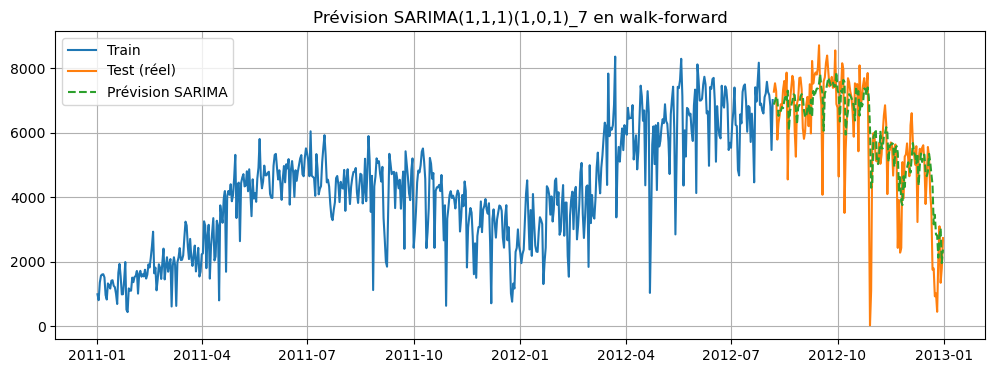

MAE SARIMA : 799.48
RMSE SARIMA : 1190.20


In [7]:
split = int(len(y) * 0.8)
train = y[:split]
test = y[split:]

history = list(train)
pred_sarima = []

for t in range(len(test)):
    model = SARIMAX(
        history,
        order=(1, 1, 1),
        seasonal_order=(1, 0, 1, 7),
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    res = model.fit(disp=False)
    yhat = res.forecast()[0]
    pred_sarima.append(yhat)

    # on ajoute la vraie observation pour le pas suivant
    history.append(test.iloc[t])

pred_sarima = np.array(pred_sarima)

# Plot
plt.figure(figsize=(12,4))
plt.plot(train.index, train.values, label="Train")
plt.plot(test.index, test.values, label="Test (réel)")
plt.plot(test.index, pred_sarima, label="Prévision SARIMA", linestyle="--")
plt.title("Prévision SARIMA(1,1,1)(1,0,1)_7 en walk-forward")
plt.legend()
plt.grid(True)
plt.show()

# Erreurs
mae_sarima = mean_absolute_error(test, pred_sarima)
rmse_sarima = np.sqrt(mean_squared_error(test, pred_sarima))
print(f"MAE SARIMA : {mae_sarima:.2f}")
print(f"RMSE SARIMA : {rmse_sarima:.2f}")
